# Analysis of Netflix Movies and TV Shows

## Content 
+ Introduction: Netflix 
+ Data Description and Objectives 
+ Data Manipulation and Cleaning 
+ Data Analysis and Visualization 

## 1. Introduction: Netflix 

Netflix, Inc. is an American technology and media services provider and production company. The company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television series, including those produced in-house. 

Since 2012, Netflix has taken more of an active role as producer and distributor for both film and television series, and to that end, it offers a variety of "Netflix Original" content through its online library. In 2013, Netflix started to create their own content.

As of April 2020, Netflix had over 193 million paid subscriptions worldwide, including 73 million in the United States. Today the company distributes content from countries all over the world. 

Source(https://en.wikipedia.org/wiki/Netflix)

## 2. Data Description and objectives

It is clear that Netflix is big content-provider and content-creator, which has a large collection of TV shows and films. It has a lot of consumers around the world and in this analysis we are interested in comparing Netflix offered content.
### Data Description
Here is the data description used for analysis:

+ Type—type of the show, either TV Show or Movie
+ Title—the name of the show
+ Director—the name or names of the directors
+ Cast—the name or names of participated actors
+ Country—country where show was filmed
+ Date_added—date when film was added to Netflix 
+ Rating—film's suitability for certain audiences based on its content.
+ Duration—how long movie (in minutes) or TV show (in seasons) has been 
+ Listed_in—in which Netflix genre does the show appears 
+ Description—film's or movie's description 

### Objectives
For this project, there are five goals:
1. Find out is the Netflix focusing on TV shows rather that on movies and the change of tendency.
2. Find out which countries produce the highest number of content
3. Analyze the rating distribution among Netflix TV shows and movies
4. Analyze the most popular genres among TV shows and movies 
5. Analyze when Netflix produces most content

## 3. Data Manipulation and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_original=pd.read_csv('netflix_titles.csv')

In [3]:
df_original

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [4]:
#to obtain information about missing values 
df_original.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

Here we see that the highest number in missed values are strings. Since we cannot replace strings, it would be better to drop all the rows contatining null values.
Since if we drop all rows, our analysis of some sections may be incorrect, that's why original and copy dataframes will be used for analysis

In [5]:
#delete duplicates from original dataset
df_original=df_original.drop_duplicates()
df_original

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [6]:
#create a copy of original dataframe, for further analysis of directors and time when Netflix produces most of its content
df=df_original.copy()

In [7]:
#change type of date_added column to the datetime
df['date_added']=pd.to_datetime(df['date_added'])

In [8]:
#check if the type has been changed 
df.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

## 4. Data Analysis and Visualization

### 4.1 Netflix content distribution 

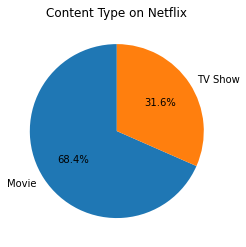

In [9]:
labels = df_original['type'].unique()
counts = df_original['type'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Content Type on Netflix")
plt.show()

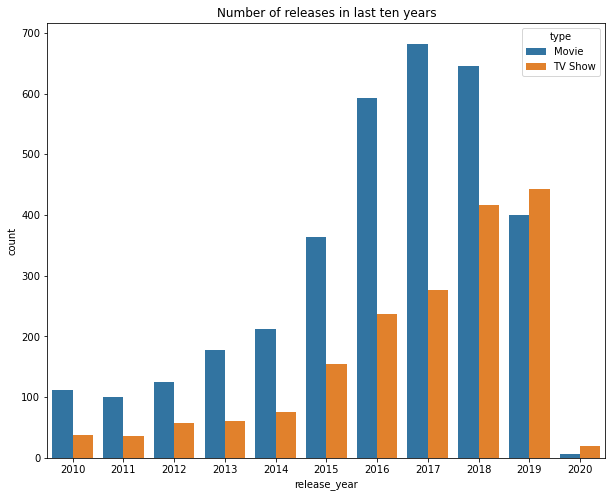

In [10]:
#distribution of Netflix content in last ten years
d1=df_original[df_original['release_year']>=2010]
plt.figure(figsize=(10,8))
sns.countplot(x="release_year",hue='type',data=d1)
plt.title('Number of releases in last ten years')
plt.show()

It is seen that Netflix contains two times more movies than TV shows. However, the tendency has started to change, and Netflix started to add more TV shows rather than movies last two years.

### 4.2 Netflix content creators countries

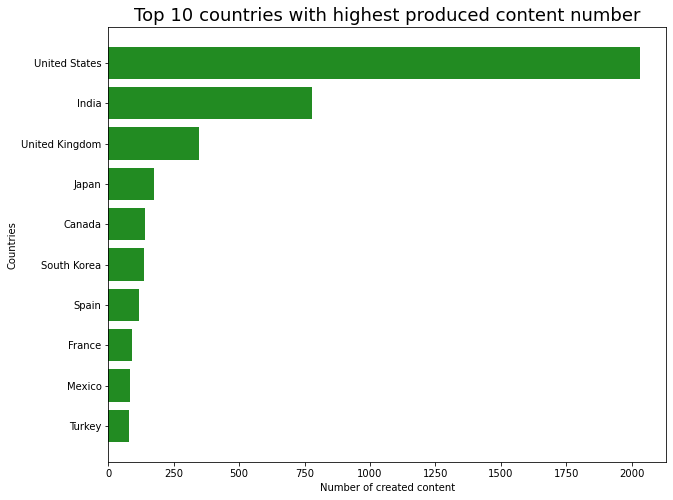

In [11]:
#top 10 countries produced most of the content
names=df['country'].value_counts()[:10].index
fig, ax = plt.subplots(figsize=(10,8))
count = df['country'].value_counts()[:10]
ax.barh(names,count, align='center',color='forestgreen')
ax.invert_yaxis()
ax.set_xlabel('Number of created content')
ax.set_ylabel('Countries')
ax.set_title('Top 10 countries with highest produced content number')
ax.title.set_fontsize(18)
plt.show()

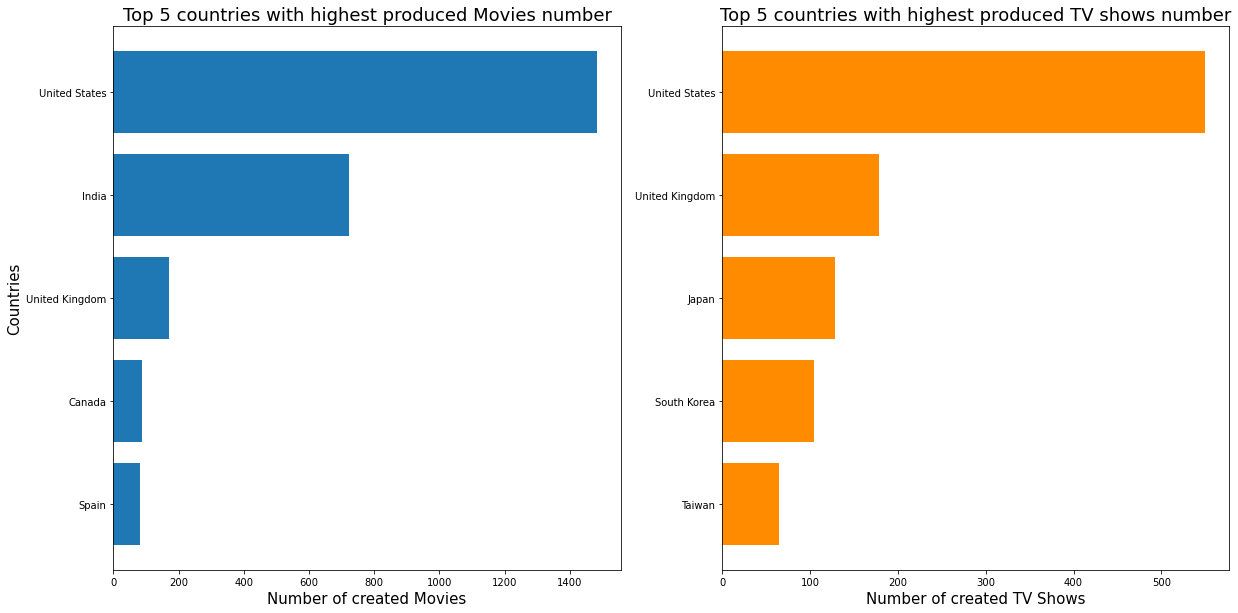

In [12]:
#top 5 countries with highest number of produced TV Shows and Movies
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,10))
#top 5 countries with the highest number of Movies
names1=df['country'].where(df['type']=="Movie").value_counts()[:5].index
count1 = df['country'].where(df['type']=="Movie").value_counts()[:5]
ax1.barh(names1,count1, align='center')
ax1.invert_yaxis()
ax1.set_ylabel('Countries')
ax1.set_xlabel('Number of created Movies')
ax1.set_title('Top 5 countries with highest produced Movies number')
#top 5 countries with the highest number of TV Shows
names2=df['country'].where(df['type']=="TV Show").value_counts()[:5].index
count2 = df['country'].where(df['type']=="TV Show").value_counts()[:5]
ax2.barh(names2,count2, align='center', color='darkorange')
ax2.invert_yaxis()
ax2.set_xlabel('Number of created TV Shows')
ax2.set_title('Top 5 countries with highest produced TV shows number')
#change the size of font for better view
ax1.title.set_fontsize(18)
ax1.yaxis.label.set_fontsize(15)
ax1.xaxis.label.set_fontsize(15)
ax2.title.set_fontsize(18)
ax2.xaxis.label.set_fontsize(15)
plt.show()

It is seen that regardless the type of content, USA, India, and UK produce most of the content on Netflix, regardless whether it is movie or TV show.

### 4.3 Rating in Netflix content

This dataset uses two raitings system: 
+ The TV parental guideline
+ The Motion Picture Association

In the dataset these ratings used:
+ TV-PG: This program contains material that parents may find unsuitable for younger children. Parental guidance is recommended.
+ TV-14: This program may be unsuitable for children under 14 years of age
+ R: Under 17 requires accompanying parent or adult guardian.
+ TV-MA: This program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17
+ NR: Unrated
+ PG-13: Some material may not be suitable for children under 13.
+ PG: Some material may not be suitable for children.
+ TV-Y7: This program is most appropriate for children age 7 and up.
+ G: All ages admitted.
+ TV-G: This program is suitable for all ages.
+ UR: Unrated
+ TV-Y7-FV:This program recommended for ages 7 and older, with the unique advisory that the program contains fantasy violence.
+ TV-Y: This program is most appropriate for children age 7 and up.
+ NC-17: No One 17 and Under Admitted.

Since many of these rating represent same restriction, but in different raiting system, they will be replaced with their analogue.

In [13]:
#replace some ratings with identical values
df['rating']=df['rating'].replace("NR","UR")
df['rating']=df['rating'].replace("TV-PG","PG")
df['rating']=df['rating'].replace("TV-G","G")
df['rating']=df['rating'].replace("TV-Y-7","TV-Y")

After that, there ratings left:
+ PG: Some material may not be suitable for children.
+ TV-MA: This program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17
+ TV-Y7-FV: This program recommended for ages 7 and older, with the unique advisory that the program contains fantasy violence.
+ TV-Y7: This program is most appropriate for children age 7 and up.
+ TV-14: This program may be unsuitable for children under 14 years of age
+ R: Under 17 requires accompanying parent or adult guardian.
+ UR: Unrated
+ PG-13: Some material may not be suitable for children under 13.
+ G: All ages admitted.
+ NC-17: No One 17 and Under Admitted.

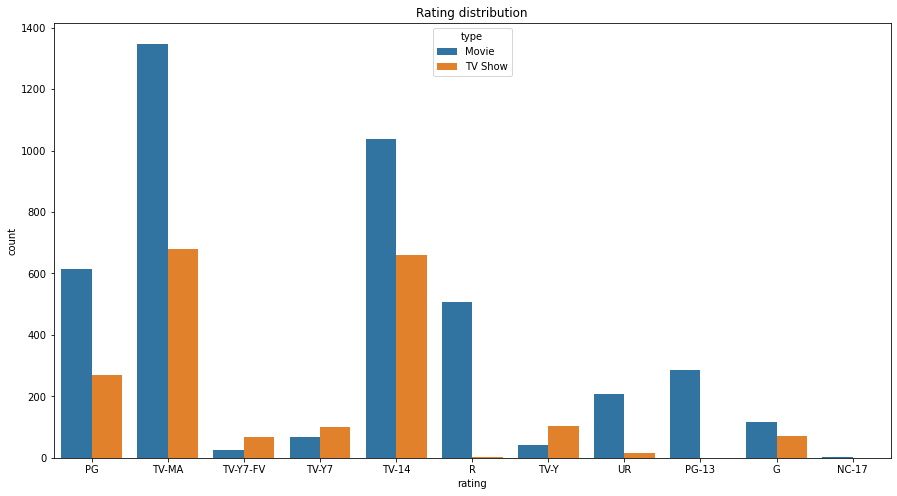

In [14]:
length=len(df_original['show_id'].index)
plt.figure(figsize=(15,8))
sns.countplot(x="rating",hue="type",data=df)
plt.title('Rating distribution')
plt.show()

It is seen that regardless the type of content, it is common that Netflix titles are for adult audience or at least not suitable for children.

### 4.4 Netflix genres

In [15]:
df['listed_in'].unique()

array(['Children & Family Movies, Comedies', 'Stand-Up Comedy',
       "Kids' TV", 'Comedies',
       'Crime TV Shows, International TV Shows, Spanish-Language TV Shows',
       'International Movies, Sci-Fi & Fantasy, Thrillers',
       'Docuseries, Science & Nature TV', 'Action & Adventure, Thrillers',
       'Action & Adventure, Dramas, International Movies',
       'Children & Family Movies',
       'Cult Movies, Dramas, Independent Movies',
       'Comedies, Independent Movies, Romantic Movies',
       'Action & Adventure, Comedies, International Movies',
       'Documentaries', 'Horror Movies, Thrillers',
       'Dramas, Independent Movies',
       'Dramas, Independent Movies, Romantic Movies',
       'International TV Shows, Romantic TV Shows, TV Comedies',
       'Docuseries', 'Horror Movies, International Movies',
       'Children & Family Movies, Comedies, Sci-Fi & Fantasy',
       'Comedies, Romantic Movies',
       'Dramas, International Movies, Thrillers',
       'Dramas, 

Some movies/TV shows has several listed genres, which are separated by comma. In order to make analysis more accurate, data manipulations will be done. 

In [16]:
#deal with several Netflix genres in one cell
genres=df.listed_in.str.split(', ', expand = True).stack().value_counts()[:10]
genres

International Movies      1927
Dramas                    1623
Comedies                  1113
International TV Shows    1001
Documentaries              668
TV Dramas                  599
Action & Adventure         597
Independent Movies         552
TV Comedies                436
Thrillers                  392
dtype: int64

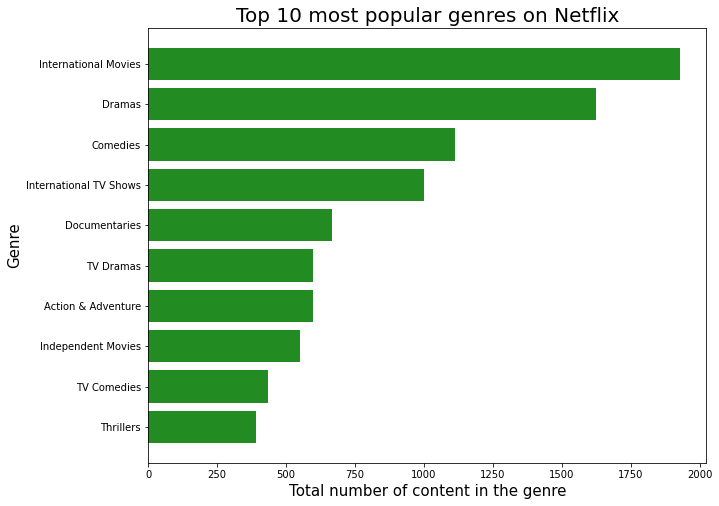

In [17]:
#top 10 popular genres on Netflix
names=genres.index
count=genres.values
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(names,count, align='center', color='forestgreen')
ax.invert_yaxis()
ax.set_xlabel('Total number of content in the genre')
ax.set_ylabel('Genre')
ax.set_title('Top 10 most popular genres on Netflix')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
plt.show()

As shown at the bar chart, the most popular Netflix genre is International Movies, while international TV Shows is only in top 5 genres in Netflix. The next most popular tag in Netflix is Drama.

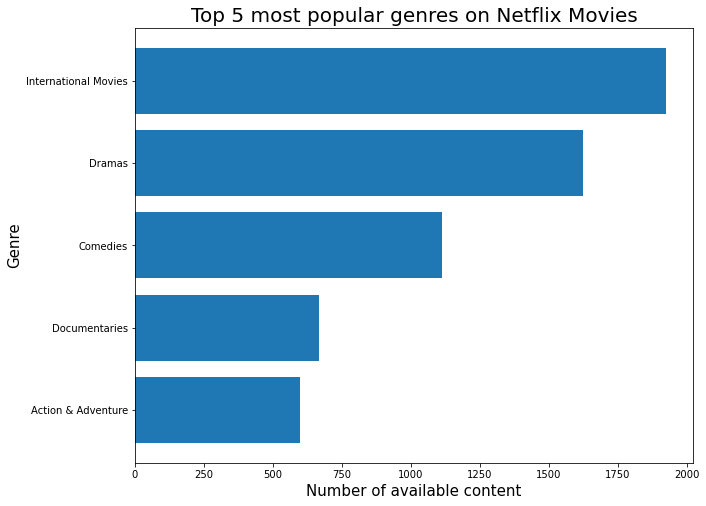

In [18]:
#top 5 most popular genres on Netflix Movies
movie_genres=df.where(df['type']=='Movie').listed_in.str.split(', ', expand = True).stack().value_counts()[:5]
names=movie_genres.index
count=movie_genres.values
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(names,count, align='center')
ax.invert_yaxis()
ax.set_xlabel('Number of available content')
ax.set_ylabel('Genre')
ax.set_title('Top 5 most popular genres on Netflix Movies')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
plt.show()

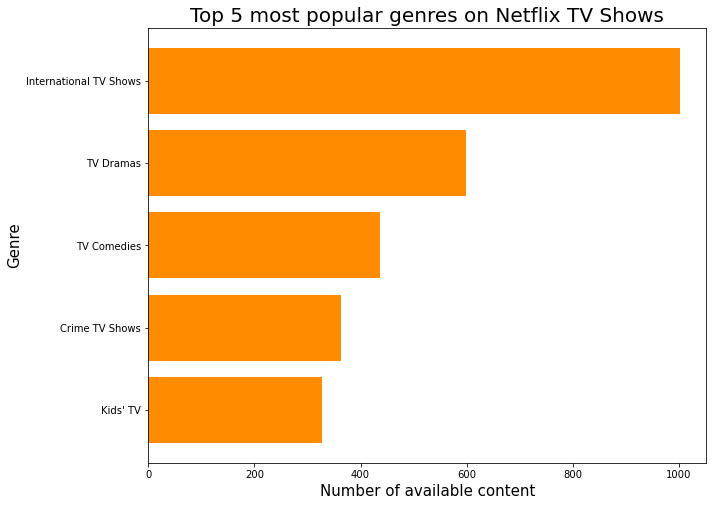

In [19]:
#top 5 most popular genres on Netflix TV shows
TV_genres =df.where(df['type']=='TV Show').listed_in.str.split(', ', expand = True).stack().value_counts()[:5]
names=TV_genres.index
count=TV_genres.values
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(names,count, align='center', color='darkorange')
ax.invert_yaxis()
ax.set_xlabel('Number of available content')
ax.set_ylabel('Genre')
ax.set_title('Top 5 most popular genres on Netflix TV Shows')
ax.title.set_fontsize(20)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
plt.show()

As seen in three bar charts, the most popular categories on Netflix, regardless the type of show, top 3 categories are international, drama, and comedy. The next popular TV show category on Netflix is crime TV shows, while in movies section it is action&adventures.

### 4.5 Netflix most productive period

It is more convinient to show how Netflix adds titles in moths through the year. The null values in dataset will be dropped, and in column "date_added" will remain only month. 

In [20]:
#drop all null values in this dataset
df=df.dropna()
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2019-08-30,2019,PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan",2019-08-02,2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States",2019-08-15,2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,2019-04-09,2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...


In [21]:
#convert date_added column so that there will be only added month 
df['date_added']=pd.DatetimeIndex(df['date_added']).month

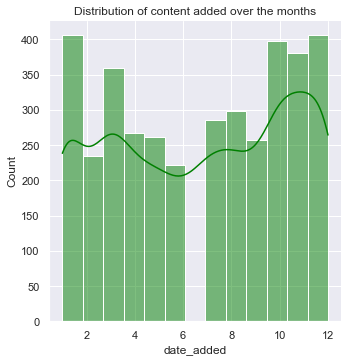

In [22]:
sns.set();
sns.displot(df, x="date_added", kde=True, color="green")
plt.title('Distribution of content added over the months')
plt.show()

According to the distribution, Netflix releases most of its content in period from October to January.

## 5. Conclusion

Based on analysis above, several things can be concluded about Netflix.

1. There are more Movies rather than TV shows on Netflix, but last year Netflix started to change tendency by producing more TV shows than movies.

2. Regardless the type of content, top 3 countries with most produced content are United States, India, and United Kingdom. However, the difference in number of produced content between USA and other countries is large.

3. The biggest part of Netflix content is intended to adult audience and unsuitable for children till the age of 14. 

4. In any case three popular Netlfix genres are international, drama, and comedy. Also among TV shows crime TV shows and British TV shows are popular, while in movies action&adventures and independent movies are popular.

5. Netflix most productive period is from October to January, when the number of released content reaches 400 titles in month. 